In [2]:
#Library Imports
import pandas as pd
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.neighbors
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor

In [2]:
# Data Preprocessing For Regression
df = pd.read_csv("dataNew6.csv")
df['change'] = df['change'].str.extract(r'(([+-]?([0-9]*[.])?[0-9]+))').astype(float).replace(np.nan, 0.0)
df = df.drop(["created",'ticker'], axis = 1)


onehot_features = ['subreddit']
onehot = sklearn.preprocessing.OneHotEncoder(sparse=False)
encoded = onehot.fit_transform(df[onehot_features])
encoded = pd.DataFrame(encoded)
df.drop(onehot_features, axis=1, inplace=True)
df = pd.concat([df, encoded], axis=1)


y = df["change"]
X = df.drop("change", axis=1)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=1)
ss = sklearn.preprocessing.StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [4]:
# SVR Grid Search
k = 5

# Hyperparameters to tune:
params = {
    'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
    'C': (1, 10)
}

print("starting grid search...")
grid = GridSearchCV(estimator=sklearn.svm.SVR(),
                         param_grid=params,
                         cv=k,
                         return_train_score=True,
                         scoring=['neg_mean_absolute_error'],
                         refit='neg_mean_absolute_error') 



# Train, print results
grid.fit(X_train, y_train)
best_hyperparams = grid.best_params_
print(best_hyperparams)


starting grid search...
{'C': 10, 'kernel': 'rbf'}


In [12]:
# Decision Tree Grid Search
k = 5

# Hyperparameters to tune:
params = {
    'criterion': ('mse', 'friedman_mse', 'mae', 'poisson'),
    'max_depth': (None, 5, 10, 20),
    'min_samples_split': (2, 5, 10)
}

print("starting grid search...")
grid_tree = GridSearchCV(estimator=DecisionTreeRegressor(),
                         param_grid=params,
                         cv=k,
                         return_train_score=True,
                         scoring=['neg_mean_absolute_error'],
                         refit='neg_mean_absolute_error') 



# Train, print results
grid_tree.fit(X_train, y_train)
best_hyperparams = grid_tree.best_params_
print(best_hyperparams)

starting grid search...


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 168, in fit
    raise ValueError("Some value(s) of y are negative which is"
ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Librar

{'criterion': 'mae', 'max_depth': 10, 'min_samples_split': 10}


In [5]:
# KNN Grid Search
grid_params = {
    'n_neighbors': [3, 5, 10, 15, 20, 25],
    'weights': ['uniform','distance']
}

gs = GridSearchCV(
     KNeighborsRegressor(),
     grid_params,
     verbose = 1,
     cv=5,
     n_jobs=-1
) 
gs_results = gs.fit(X_train, y_train)
print(gs_results.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'n_neighbors': 25, 'weights': 'uniform'}


In [10]:
# SGD Grid Search
grid_params = {
    'loss': ['squared_loss', 'huber', 'squared_epsilon_insensitive'],
    'penalty': ['l2','l1', 'elasticnet'],
    'fit_intercept': [True, False],
    'shuffle': [True, False],
    'early_stopping' : [True, False]
}

gs = GridSearchCV(
     SGDRegressor(),
     grid_params,
     verbose = 1,
     cv=5,
     n_jobs=-1
) 
gs_results = gs.fit(X_train, y_train)
print(gs_results.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'early_stopping': True, 'fit_intercept': True, 'loss': 'huber', 'penalty': 'l2', 'shuffle': True}


In [7]:
# Best Base Estimators
svr = SVR(C=100, kernel = 'rbf')
tree = DecisionTreeRegressor(criterion = 'mae', max_depth = 10, min_samples_split = 10)
knn = KNeighborsRegressor(n_neighbors = 25, weights = 'uniform')
sgd = SGDRegressor(loss = 'huber', penalty = 'l2', fit_intercept = True, shuffle = True, early_stopping = True)
rf = RandomForestRegressor(criterion = 'mae', max_depth = 10, min_samples_split = 10, n_estimators = 100)


In [13]:
# Random Forest Grid Search
grid_params = {
    'n_estimators': [10, 100, 200],
}

gs = GridSearchCV(
     RandomForestRegressor(n_estimators = 100criterion = 'mae', max_depth = 10, min_samples_split = 10),
     grid_params,
     verbose = 1,
     cv=5,
     n_jobs=-1
) 
gs_results = gs.fit(X_train, y_train)
print(gs_results.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
{'n_estimators': 100}


In [62]:
# Random Forest Grid Search # 2
grid_params = {
    'criterion': ['mae', 'mse'],
    'max_depth': [None, 10]
}

gs = GridSearchCV(
     RandomForestRegressor(n_estimators = 100),
     grid_params,
     verbose = 1,
     cv=5,
     n_jobs=-1
) 
gs_results = gs.fit(X_train, y_train)
print(gs_results.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'criterion': 'mae', 'max_depth': 10}


In [32]:
# Stacking Grid Search
grid_params = {
    'final_estimator': [None, LinearRegression()],
}

gs = GridSearchCV(
     StackingRegressor(estimators = [DecisionTreeRegressor(criterion = 'mae', max_depth = 10, min_samples_split = 10), KNeighborsRegressor(n_neighbors = 25, weights = 'uniform'), SGDRegressor(loss = 'huber', penalty = 'l2', fit_intercept = True, shuffle = True, early_stopping = True), RandomForestRegressor(criterion = 'mae', max_depth = 10, min_samples_split = 10, n_estimators = 100)]),
     grid_params,
     verbose = 1,
     cv=5,
) 
gs_results = gs.fit(X_train, y_train)
print(gs_results.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


TypeError: 'DecisionTreeRegressor' object is not iterable

In [63]:
# Bagging Grid Search
grid_params = {
    'n_estimators': [10, 50],
    'max_samples': [0.6, 1.0],
    'max_features': [0.6, 1.0],
}

gs = GridSearchCV(
     BaggingRegressor(base_estimator = SVR(C = 100, kernel = 'rbf')),
     grid_params,
     verbose = 1,
     cv=5,
     n_jobs=-1
) 
gs_results = gs.fit(X_train, y_train)
print(gs_results.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}


In [33]:
# MAE, MSE, R-Squared for Basic Models

svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
svr_mae = sklearn.metrics.mean_absolute_error(y_test, svr_pred, sample_weight = None)
svr_mse = sklearn.metrics.mean_squared_error(y_test, svr_pred)
svr_r2 = sklearn.metrics.r2_score(y_test, svr_pred)

tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
tree_mae = sklearn.metrics.mean_absolute_error(y_test, tree_pred, sample_weight = None)
tree_mse = sklearn.metrics.mean_squared_error(y_test, tree_pred)
tree_r2 = sklearn.metrics.r2_score(y_test, tree_pred)


knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_mae = sklearn.metrics.mean_absolute_error(y_test, knn_pred, sample_weight = None)
knn_mse = sklearn.metrics.mean_squared_error(y_test, knn_pred)
knn_r2 = sklearn.metrics.r2_score(y_test, knn_pred)

sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
sgd_mae = sklearn.metrics.mean_absolute_error(y_test, sgd_pred, sample_weight = None)
sgd_mse = sklearn.metrics.mean_squared_error(y_test, sgd_pred)
sgd_r2 = sklearn.metrics.r2_score(y_test, sgd_pred)

print('SVR')
print(svr_mae)
print(svr_mse)
print(svr_r2)
print('Tree')
print(tree_mae)
print(tree_mse)
print(tree_r2)
print('KNN')
print(knn_mae)
print(knn_mse)
print(knn_r2)
print('SGD')
print(sgd_mae)
print(sgd_mse)
print(sgd_r2)


SVR
5.17728333661897
104.21743043078311
0.04899741250390843
Tree
5.745651952380952
120.14800571477812
-0.09637192017641083
KNN
13.77966785952381
18310.745168136196
-166.08880618050208
SGD
5.307060329819435
109.70317930413555
-0.0010610215924573563


In [8]:
n_examples = range(100, X.shape[0], 500)
train_errors = []
validation_errors = []

for n in n_examples:
    print(n, end=" ")
    
    X_curr = X[0:n]
    y_curr = y[0:n]
    
    scores = sklearn.model_selection.cross_validate(svr, X_curr, y_curr, cv=5, scoring="neg_mean_absolute_error", return_train_score=True) 
                                    # cross_validate() is a more general version of cross_val_score() that can return both the training and validation error. Look it up!
    
    avg_train_score = -scores["train_score"].mean() # negate for mean absolute error
    avg_validation_score = -scores["test_score"].mean() # negate for mean absolute error
    
    train_errors.append(avg_train_score)
    validation_errors.append(avg_validation_score)

100 600 1100 1600 2100 2600 3100 3600 4100 4600 5100 5600 6100 6600 7100 7600 8100 [2.8480901936845817, 5.33349426331943, 6.67625440989953, 5.830381276460879, 32.391788884696155, 27.328980633051437, 24.205251635157502, 21.415521249863794, 19.347186573341933, 17.998778898935768, 16.705788986572053, 15.53810240849269, 14.733057806789626, 14.279522721254983, 13.536978459827063, 12.922494733761997, 12.471581855768143]


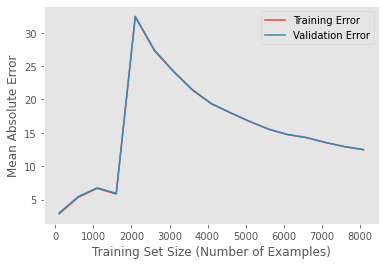

In [73]:
plt.plot(n_examples, train_errors, label="Training Error")
plt.plot(n_examples, validation_errors, label="Validation Error")
plt.xlabel("Training Set Size (Number of Examples)")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.grid()
plt.savefig('SVRTraining.pdf')

In [37]:
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mae = sklearn.metrics.mean_absolute_error(y_test, rf_pred, sample_weight = None)
rf_mse = sklearn.metrics.mean_squared_error(y_test, rf_pred)
rf_r2 = sklearn.metrics.r2_score(y_test, rf_pred)
print('RF')
print(rf_mae)
print(rf_mse)
print(rf_r2)

In [40]:
rf2 = RandomForestRegressor(criterion = 'mae', min_samples_split = 5, n_estimators = 10)
rf2.fit(X_train, y_train)
rf_pred2 = rf2.predict(X_test)
print(rf_pred2)
rf_mae2 = sklearn.metrics.mean_absolute_error(y_test, rf_pred2, sample_weight = None)
rf_mse2 = sklearn.metrics.mean_squared_error(y_test, rf_pred2)
rf_r22 = sklearn.metrics.r2_score(y_test, rf_pred2)
print('RF2')
print(rf_mae2)
print(rf_mse2)
print(rf_r22)

[ -1.39146525  -3.8724836   -0.7917767  ...   0.22256615 -16.0200772
   1.65096875]
RF2
9.727169738541669
5910.531697885671


NameError: name 'rf_r22' is not defined

In [38]:
print('SVR')
print(svr_mae)
print(svr_mse)
print(svr_r2)
print('Tree')
print(tree_mae)
print(tree_mse)
print(tree_r2)
print('KNN')
print(knn_mae)
print(knn_mse)
print(knn_r2)
print('SGD')
print(sgd_mae)
print(sgd_mse)
print(sgd_r2)
print('RF')
print(rf_mae)
print(rf_mse)
print(rf_r2)

SVR
5.17728333661897
104.21743043078311
0.04899741250390843
Tree
5.728090398809524
119.68851898579219
-0.09217902205582273
KNN
13.77966785952381
18310.745168136196
-166.08880618050208
SGD
5.306586705732727
109.66799525590687
-0.0007399608949736347
RF
9.21031208672619
4274.437814449815
-38.005005255169074


In [49]:
#MAE, MSE, R2 for Ensemble Methods




bag = BaggingRegressor(base_estimator = SVR(C = 10, kernel = 'rbf'), max_features = 1.0, max_samples = 1.0, n_estimators = 50)
bag.fit(X_train, y_train)
bag_pred = bag.predict(X_test)
bag_mae = sklearn.metrics.mean_absolute_error(y_test, bag_pred, sample_weight = None)
bag_mse = sklearn.metrics.mean_squared_error(y_test, bag_pred)
bag_r2 = sklearn.metrics.r2_score(y_test, bag_pred)


print('Bag')
print(bag_mae)
print(bag_mse)
print(bag_r2)

Bag
5.243659893071594
107.23631760696885
0.02144953011951034


In [48]:
log = sklearn.linear_model.LogisticRegression(penalty = 'l2', fit_intercept = True)
log.fit(X_train, y_train)
log_pred = log.predict(X_test)
log_mae = sklearn.metrics.mean_absolute_error(y_test, log_pred, sample_weight = None)
log_mse = sklearn.metrics.mean_squared_error(y_test, log_pred)
log_r2 = sklearn.metrics.r2_score(y_test, log_pred)
print('Log')
print(log_mae)
print(log_mse)
print(log_r2)

ValueError: Unknown label type: 'continuous'

In [12]:
base_learners = [('svr', SVR(C = 100, kernel = 'rbf')),
                 ('tre', DecisionTreeRegressor(criterion = 'mae', max_depth = 10, min_samples_split = 10)),
                 ('sgd', SGDRegressor(loss = 'huber', penalty = 'l2', fit_intercept = True, shuffle = True, early_stopping = True))]
stack = StackingRegressor(estimators=base_learners, final_estimator = SVR(C = 100, kernel = 'rbf'))
stack.fit(X_train, y_train)
stack_pred = stack.predict(X_test)
stack_mae = sklearn.metrics.mean_absolute_error(y_test, stack_pred, sample_weight = None)
stack_mse = sklearn.metrics.mean_squared_error(y_test, stack_pred)
stack_r2 = sklearn.metrics.r2_score(y_test, stack_pred)
print('Stack')
print(stack_mae)
print(stack_mse)
print(stack_r2)

Stack
5.2849661531292185
107.48430457316663
0.01918660494908009


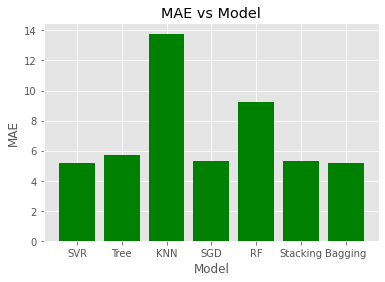

In [67]:
# MAE Bar Chart
%matplotlib inline
plt.style.use('ggplot')

x = ['SVR', 'Tree', 'KNN', 'SGD', 'RF', 'Stacking', 'Bagging']
mae = [svr_mae, tree_mae, knn_mae, sgd_mae, rf_mae, stack_mae, bag_mae]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, mae, color='green')
plt.xlabel("Model")
plt.ylabel("MAE")
plt.title("MAE vs Model")

plt.xticks(x_pos, x)


plt.savefig('MAEPlot.pdf')

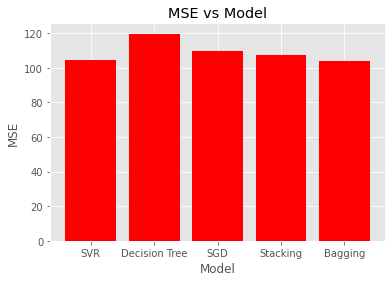

<Figure size 432x288 with 0 Axes>

In [68]:
%matplotlib inline
plt.style.use('ggplot')

x = ['SVR', 'Decision Tree', 'SGD', 'Stacking', 'Bagging']
mae = [svr_mse, tree_mse, sgd_mse, stack_mse, bag_mse]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, mae, color='red')
plt.xlabel("Model")
plt.ylabel("MSE")
plt.title("MSE vs Model")

plt.xticks(x_pos, x)

plt.show()
plt.savefig('MSEPlot.pdf')

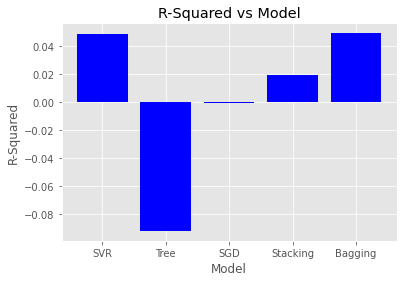

In [69]:
# MAE Bar Chart
%matplotlib inline
plt.style.use('ggplot')

x = ['SVR', 'Tree', 'SGD', 'Stacking', 'Bagging']
mae = [svr_r2, tree_r2, sgd_r2, stack_r2, bag_r2]

x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, mae, color='blue')
plt.xlabel("Model")
plt.ylabel("R-Squared")
plt.title("R-Squared vs Model")

plt.xticks(x_pos, x)


plt.savefig('R-SquaredPlot.pdf')

In [8]:
bag = BaggingRegressor(base_estimator = SVR(C = 10, kernel = 'rbf'), max_features = 1.0, max_samples = 1.0, n_estimators = 50)

base_learners = [('svr', SVR(C = 100, kernel = 'rbf')),
                 ('tre', DecisionTreeRegressor(criterion = 'mae', max_depth = 10, min_samples_split = 10)),
                 ('sgd', SGDRegressor(loss = 'huber', penalty = 'l2', fit_intercept = True, shuffle = True, early_stopping = True))]
stack = StackingRegressor(estimators=base_learners, final_estimator = SVR(C = 100, kernel = 'rbf'))
svr_mae_scores = sklearn.model_selection.cross_val_score(svr, X_train, y_train, cv=10, scoring="neg_mean_absolute_error")
svr_mae_cv = -np.mean(svr_mae_scores)

tree_mae_scores = sklearn.model_selection.cross_val_score(tree, X_train, y_train, cv=10, scoring="neg_mean_absolute_error")
tree_mae_cv = -np.mean(tree_mae_scores)

knn_mae_scores = sklearn.model_selection.cross_val_score(knn, X_train, y_train, cv=10, scoring="neg_mean_absolute_error")
knn_mae_cv = -np.mean(knn_mae_scores)

stack_mae_scores = sklearn.model_selection.cross_val_score(stack, X_train, y_train, cv=10, scoring="neg_mean_absolute_error")
stack_mae_cv = -np.mean(stack_mae_scores)

bag_mae_scores = sklearn.model_selection.cross_val_score(bag, X_train, y_train, cv=10, scoring="neg_mean_absolute_error")
bag_mae_cv = -np.mean(bag_mae_scores)

print(svr_mae_cv)
print(tree_mae_cv)
print(knn_mae_cv)
print(stack_mae_cv)
print(bag_mae_cv)

NameError: name 'X_train' is not defined

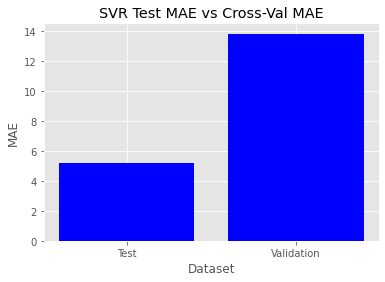

In [51]:
# SVR: MAE Bar Chart Test vs. Val
%matplotlib inline
plt.style.use('ggplot')

x1 = ['Test', 'Validation']
mae_comp1 = [svr_mae, svr_mae_cv]

x_pos1 = [i for i, _ in enumerate(x1)]

plt.bar(x_pos1, mae_comp1, color='blue')
plt.xlabel("Dataset")
plt.ylabel("MAE")
plt.title("SVR Test MAE vs Cross-Val MAE")

plt.xticks(x_pos1, x1)


plt.savefig('SVR_test_vs_crossval.pdf')


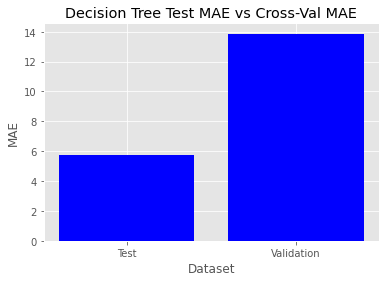

In [52]:
# Decision Tree: MAE Bar Chart Test vs. Val
%matplotlib inline
plt.style.use('ggplot')

x2 = ['Test', 'Validation']
mae_comp2 = [tree_mae, tree_mae_cv]

x_pos2 = [i for i, _ in enumerate(x2)]

plt.bar(x_pos2, mae_comp2, color='blue')
plt.xlabel("Dataset")
plt.ylabel("MAE")
plt.title("Decision Tree Test MAE vs Cross-Val MAE")

plt.xticks(x_pos2, x2)


plt.savefig('tree_test_vs_crossval.pdf')

In [5]:
# KNN: MAE Bar Chart Test vs. Val

%matplotlib inline
plt.style.use('ggplot')

x3 = ['Test', 'Validation']
mae_comp3 = [13.77966785952381, knn_mae_cv]

x_pos3 = [i for i, _ in enumerate(x3)]

plt.bar(x_pos3, mae_comp3, color='blue')
plt.xlabel("Dataset")
plt.ylabel("MAE")
plt.title("KNN Test MAE vs Cross-Val MAE")

plt.xticks(x_pos3, x3)


plt.savefig('knn_test_vs_crossval.pdf')

NameError: name 'knn_mae_cv' is not defined

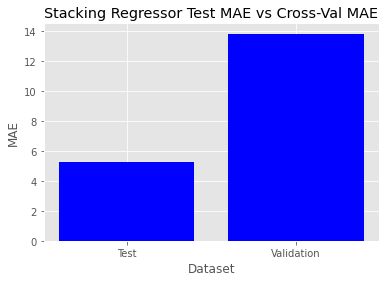

In [54]:
# Stacking: MAE Bar Chart Test vs. Val
%matplotlib inline
plt.style.use('ggplot')

x4 = ['Test', 'Validation']
mae_comp4 = [stack_mae, stack_mae_cv]

x_pos4 = [i for i, _ in enumerate(x4)]

plt.bar(x_pos4, mae_comp4, color='blue')
plt.xlabel("Dataset")
plt.ylabel("MAE")
plt.title("Stacking Regressor Test MAE vs Cross-Val MAE")

plt.xticks(x_pos4, x4)


plt.savefig('stack_test_vs_crossval.pdf')

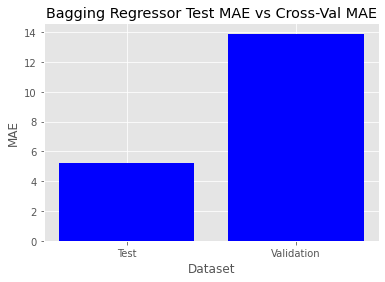

In [55]:
# Bagging: MAE Bar Chart Test vs. Val
%matplotlib inline
plt.style.use('ggplot')

x5 = ['Test', 'Validation']
mae_comp5 = [bag_mae, bag_mae_cv]

x_pos5 = [i for i, _ in enumerate(x5)]

plt.bar(x_pos5, mae_comp5, color='blue')
plt.xlabel("Dataset")
plt.ylabel("MAE")
plt.title("Bagging Regressor Test MAE vs Cross-Val MAE")

plt.xticks(x_pos5, x5)


plt.savefig('bag_test_vs_crossval.pdf')

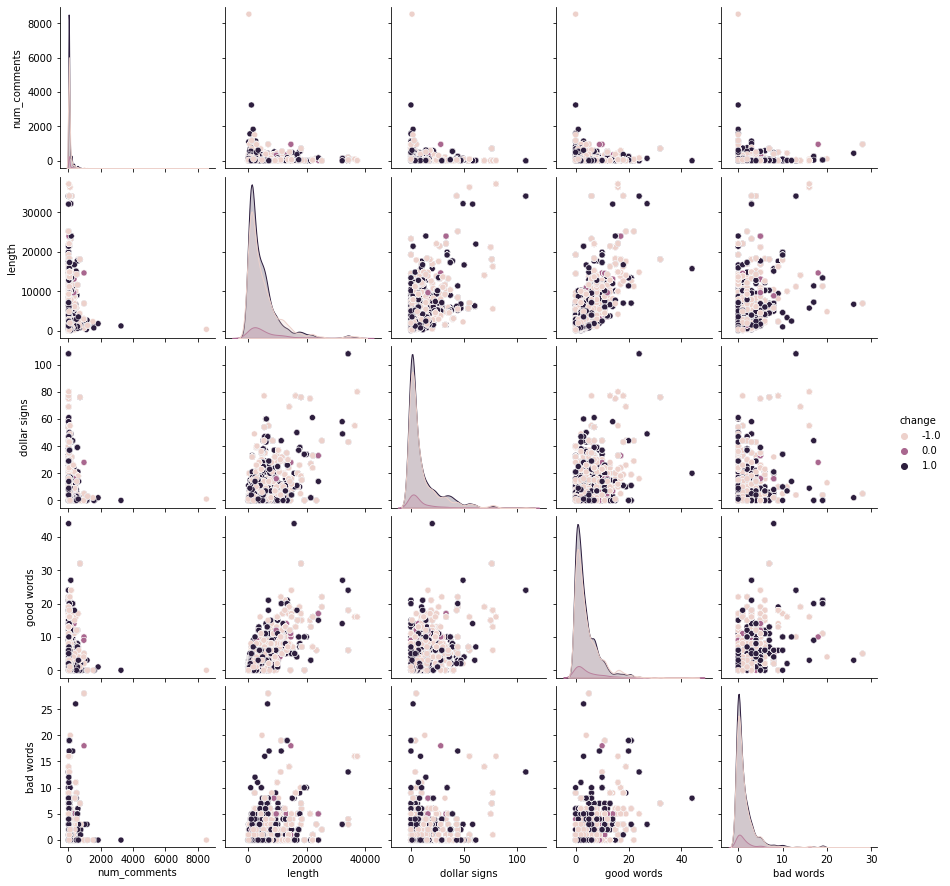

In [3]:
plot_df = pd.read_csv("dataNew6.csv")
plot_df['change'] = plot_df['change'].str.extract(r'(([+-]?([0-9]*[.])?[0-9]+))').astype(float).replace(np.nan, 0.0)
plot_df['change'] = np.sign(plot_df['change'])
plot_df = plot_df.drop(["created",'ticker', "subreddit", 'percent signs', 'ques marks', 'exclam points', 'score'], axis = 1)
sns.pairplot(data = plot_df, hue = 'change')
plt.savefig('ClassificationPairplot.pdf')